<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px"></p>

# Law of probability
This chapter will explain the law of probability and give you some trading examples of it.

<br>

### After this Chapter you will be able to:
* Compute and understand how to interprate the Bernoulli law
* Compute and understand how to interprate the Binomial law
* Compute and understand how to interprate the Poisson law
* Compute and understand how to interprate the Uniform law
* Compute and understand how to interprate the Exponential law
* Compute and understand how to interprate the Normal law



<br>
<br>
<br>

### Exercises (Trading / Portfolio management):
* Compute the value at risk of a financial asset
* Analyze the stop loss and take profit





<br>
<br>

💰Join our community: https://discord.gg/wXjNPAc5BH

📚Read our book: https://www.amazon.com/gp/product/B09HG18CYL 

🖥️Quantreo's YouTube channel: https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import binom, poisson, expon
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
# The code here will allow you to switch your graphics to dark mode for those who choose to code in dark mode
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

# Binomial distribution

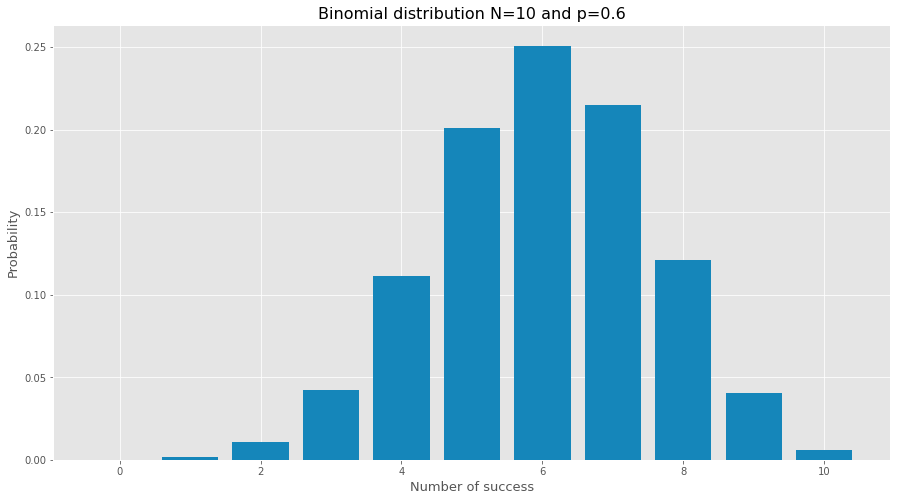

In [ ]:
# ------------ Initialiaze distribution setting ---------------
# Number of iterations 
n = 10

# Probability of success
p = 0.6


# ------------ Compute the probability ---------------
# List of possible number of success
nb_success = list(range(n + 1))

# list of pmf values
proba = [binom.pmf(b, n, p) for b in nb_success ]


# ------------ Plot the density ---------------
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the distribution
plt.bar(nb_success, proba, color="#1586BA")

# Give x/y labels and a title
plt.title(f"Binomial distribution N={n} and p={p}", size=16)
plt.xlabel("Number of success", size=13)
plt.ylabel("Probability", size=13)

plt.show()

# Poisson Distribution

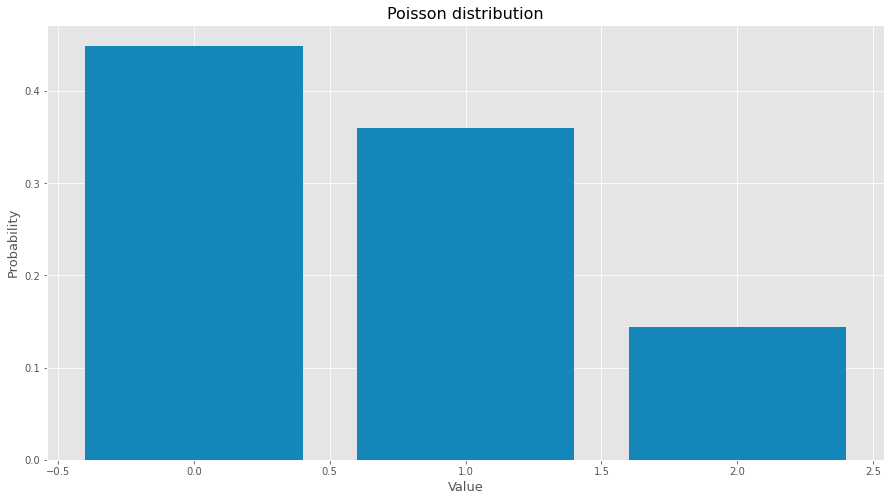

In [ ]:
# ------------ Simulate Poisson Process ---------------
# Set lambda parameter
l = 0.8

# Find the discrete values which cover the domain
x = np.arange(poisson.ppf(0.01, l),
             poisson.ppf(0.99, l))

# Compute the proba of each value
proba = poisson.pmf(x, l)

# ------------ Plot the density ---------------
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the distribution
plt.bar(x, proba, color="#1586BA")

# Give x/y labels and a title
plt.title(f"Poisson distribution", size=16)
plt.xlabel("Value", size=13)
plt.ylabel("Probability", size=13)

plt.show()

# Continuous Uniform Law

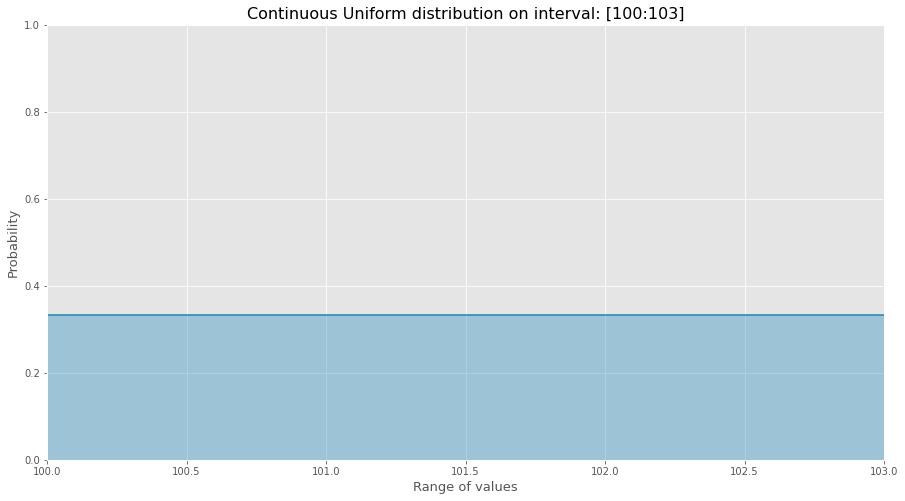

In [ ]:
# ------------ Initialiaze distribution setting ---------------
a = 100
b = 103

# ------------ Plot the density ---------------
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the distribution
plt.axhline(1/(b-a), color="#1586BA")
plt.fill_between([a,b],0, 1/(b-a), color="#1586BA", alpha=0.35)

# Give x/y labels and a title
plt.title(f"Continuous Uniform distribution on interval: [{a}:{b}]", size=16)
plt.xlabel("Range of values", size=13)
plt.ylabel("Probability", size=13)

#
plt.ylim([0,1])
plt.xlim([a,b])


plt.show()

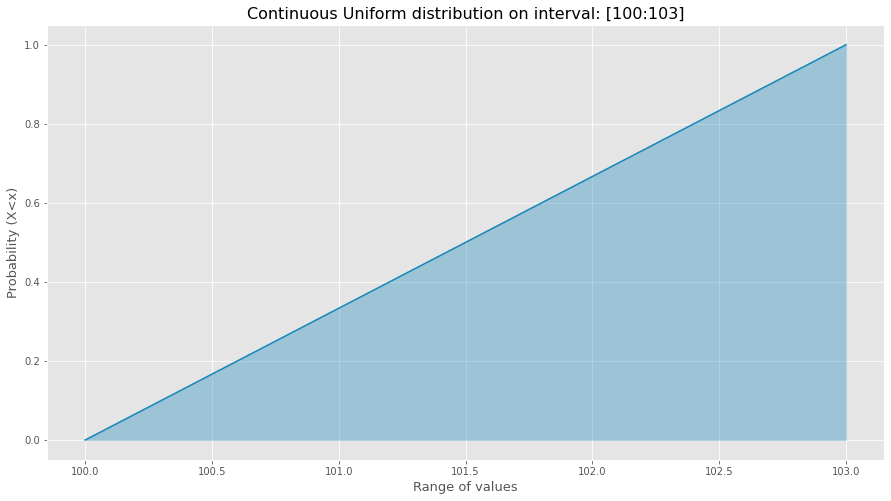

In [ ]:
# ------------ Initialiaze distribution setting ---------------
a = 100
b = 103

domain = np.linspace(a,b,50)
p = [(x-a)/(b-a) for x in domain]
# ------------ Plot the density ---------------
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the distribution
plt.plot(domain, p,color="#1586BA")
plt.fill_between(domain,0, p, color="#1586BA", alpha=0.35)

# Give x/y labels and a title
plt.title(f"Continuous Uniform distribution on interval: [{a}:{b}]", size=16)
plt.xlabel("Range of values", size=13)
plt.ylabel("Probability (X<x)", size=13)

#
# plt.ylim([0,1])
# plt.xlim([a,b])


plt.show()

# Exponential distribution
https://stackoverflow.com/questions/15415455/plotting-probability-density-function-by-sample-with-matplotlib

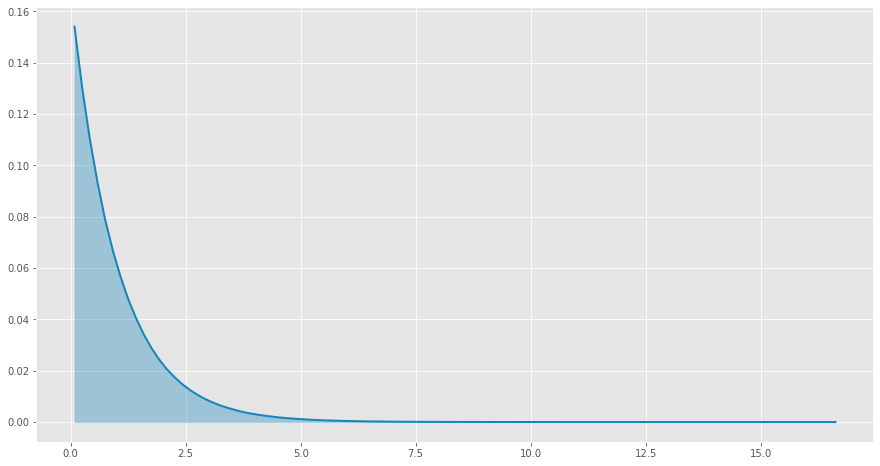

In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt

N = 10000000
n = N//100000
s = np.random.exponential(scale=1, size=(N,)) # generate your data sample with N elements
p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=n)
plt.figure(figsize=(15,8))
plt.plot(x, f(x)/N, color="#1586BA", linewidth=2)
plt.fill_between(x,0, f(x)/N, color="#1586BA", alpha=0.35)

plt.show()

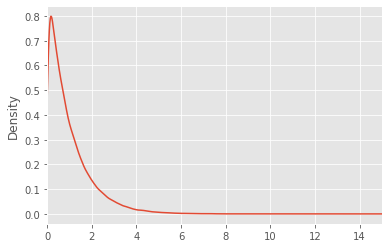

In [ ]:
# ------------ Simulate realization coming from a exponential law ---------------
arr = np.random.exponential(scale=1, size=(100000,))
df = pd.DataFrame(arr, columns=["sim"]).sort_values(by="sim", ascending=True)
df["probability"] = 1/len(df)

df["sim"].plot(kind="kde", xlim=[0,15])

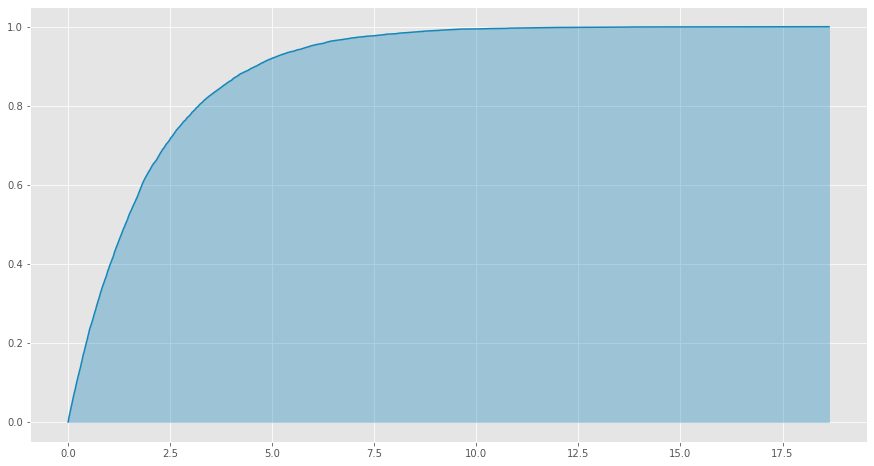

In [ ]:
arr = np.random.exponential(scale=2, size=(10000,))
df = pd.DataFrame(arr, columns=["sim"]).sort_values(by="sim", ascending=True)
df["probability"] = 1/len(df)

plt.figure(figsize=(15,8))
plt.plot(df["sim"], df["probability"].cumsum(), color="#1586BA")
plt.fill_between(df["sim"],0, df["probability"].cumsum(), color="#1586BA", alpha=0.35)

# The normal distribution

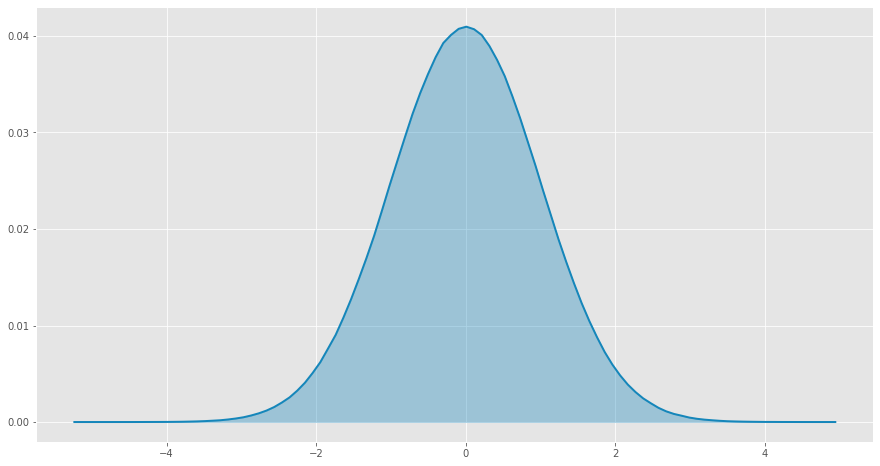

In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt

N = 10000000
n = N//100000
s = np.random.normal(scale=1, size=(N,)) # generate your data sample with N elements
p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=n)
plt.figure(figsize=(15,8))
plt.plot(x, f(x)/N, color="#1586BA", linewidth=2)
plt.fill_between(x,0, f(x)/N, color="#1586BA", alpha=0.35)

plt.show()

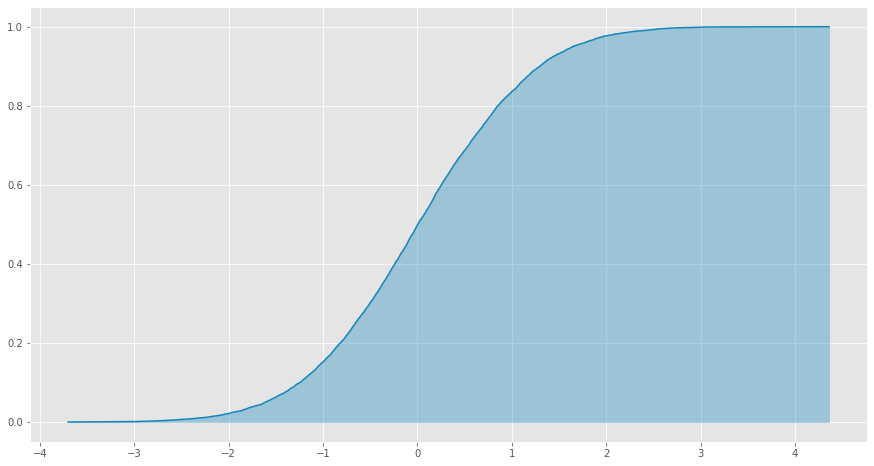

In [ ]:
#plt.plot(np.random.exponential(scale=2, size=(1000)))

arr = np.random.normal(scale=1, size=(10000,))
df = pd.DataFrame(arr, columns=["sim"]).sort_values(by="sim", ascending=True)
df["probability"] = 1/len(df)

plt.figure(figsize=(15,8))
plt.plot(df["sim"], df["probability"].cumsum(), color="#1586BA")
plt.fill_between(df["sim"],0, df["probability"].cumsum(), color="#1586BA", alpha=0.35)


# Exercise: Compute the value at risk of a financial asset

In [ ]:
df = yf.download("GOOG").pct_change(1).dropna()

[*********************100%***********************]  1 of 1 completed


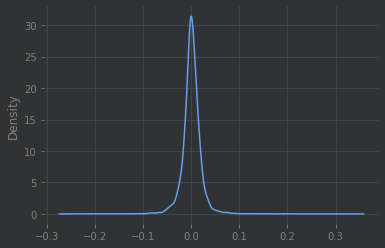

In [ ]:
df["Close"].plot(kind="kde")

In [ ]:
VaR = np.quantile(df["Adj Close"], 0.05)*100
print(f"Value at risk: {'%.2f' % VaR} %")

Value at risk: -2.71 %


# Exercise: Analyze the stop loss and take profit

In [ ]:
# Import the data
df = yf.download("GOOG")

# Compute variation Max and Min by day 
df["high"] = (df["High"] - df["Open"])/df["Open"]
df["low"] = (df["Low"] - df["Open"])/df["Open"]

[*********************100%***********************]  1 of 1 completed


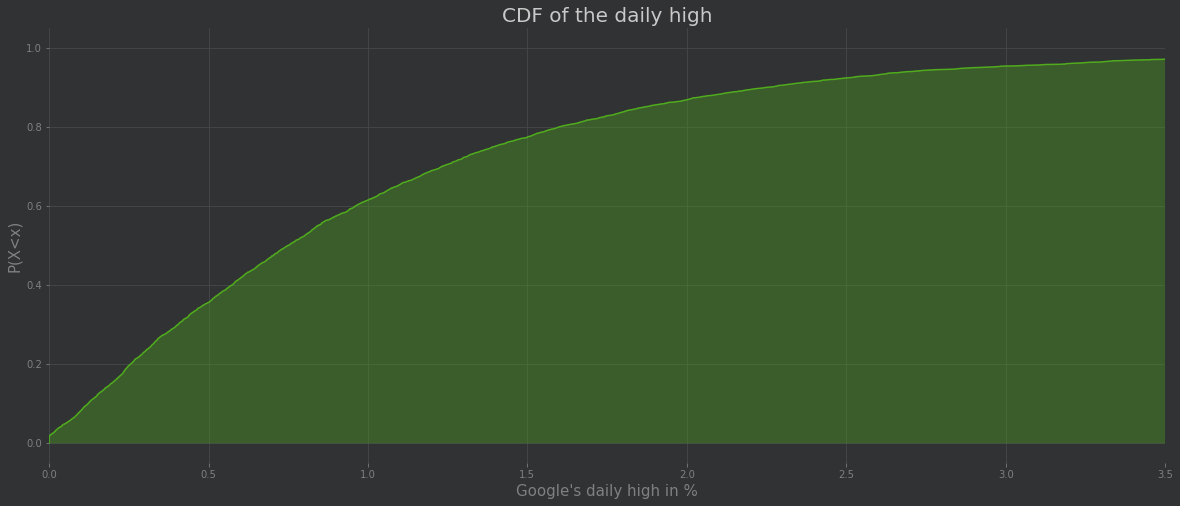

In [ ]:
# -------- Prepare the data ----------
# Remove missing values and order them
dfh = df[["high"]].dropna().sort_values(by="high", ascending=True)

# Weight for each value
dfh["probability"] = 1/len(dfh)


# -------- Plot the graph ----------
# Adapt the size
plt.figure(figsize=(20,8))

# Put a ylabel
plt.ylabel("P(X<x)", size=15)

# Put a xlabel
plt.xlabel("Google's daily high in %", size=15)

# Put a title
plt.title("CDF of the daily high", size=20)

# Plot the line of the CDF
plt.plot(dfh["high"]*100, dfh["probability"].cumsum(), color="#50AB1E")

# Plot the area of the CDF
plt.fill_between(dfh["high"]*100,0, dfh["probability"].cumsum(), color="#50AB1E", alpha=0.35)

# Define x limits
plt.xlim([0,3.5])

# Plot the graph
plt.show()

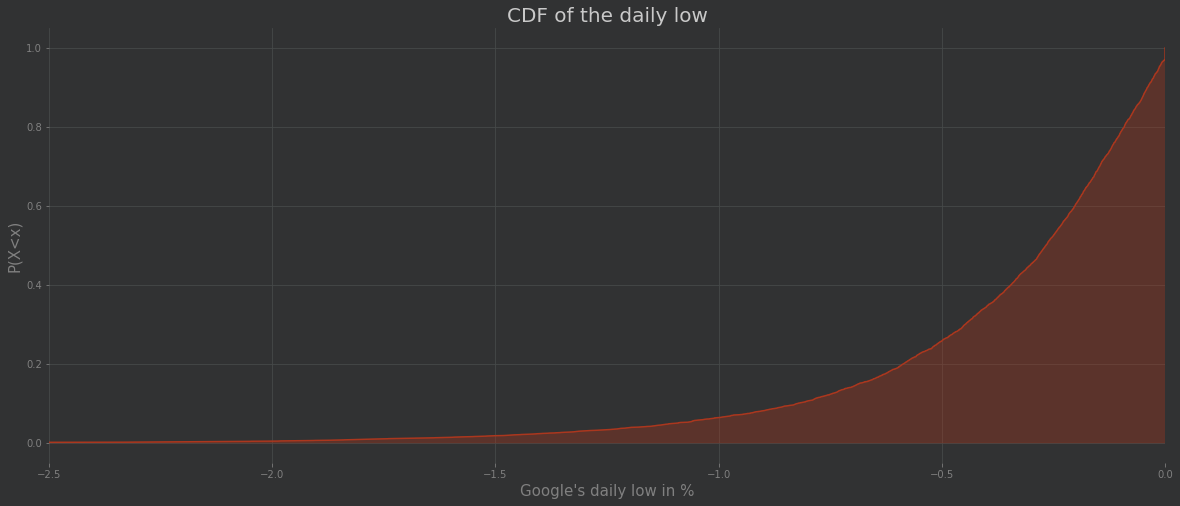

In [ ]:
# -------- Prepare the data ----------

# Remove missing values and order them
dfl = df[["low"]].dropna().sort_values(by="low", ascending=True)

# Weight for each value
dfl["probability"] = 1/len(dfl)


# -------- Plot the graph ----------
# Adapt the size
plt.figure(figsize=(20,8))

# Put a ylabel
plt.ylabel("P(X<x)", size=15)

# Put a xlabel
plt.xlabel("Google's daily low in %", size=15)

# Put a title
plt.title("CDF of the daily low", size=20)

# Plot the line of the CDF
plt.plot(dfl["low"]*100, dfl["probability"].cumsum(), color="#AB371E")

# Plot the area of the CDF
plt.fill_between(dfl["low"]*100,0, dfl["probability"].cumsum(), color="#AB371E", alpha=0.35)

# Define x limits
plt.xlim([-2.5, 0])

# Plot the graph
plt.show()